# Project 2 - Kristen Scott

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

# Data generating processes

The data will come from either of two types of sources. 

1. Linear combination of sines and cosines
2. Linear combination of Legendre polynomials

defined on the interal $t \in [-\frac 1 2, +\frac 1 2]$

## Family 1: Sines and Cosines (Fourier Series)

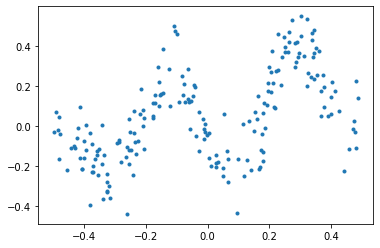

In [2]:
# produce training data
sigma = 0.1
n = 200
np.random.seed(3)
t = np.random.rand(n) - 0.5
noise = sigma * np.random.randn(n)

t = np.random.rand(n) - 0.5

def fourier(t, p):
    n = t.size
    return np.stack(
        [np.cos(f * 2*np.pi*t) for f in range(0, (p+1)//2)] +
        [np.sin(f * 2*np.pi*t) for f in range(1, (p+2)//2)])

p = 6   # number of features
X = fourier(t, p)  
theta = 0.1*np.random.randn(p)
y = theta @ X + noise   # training data 

plt.plot(t, y, '.')

## Family 2: Legendre Polynomials

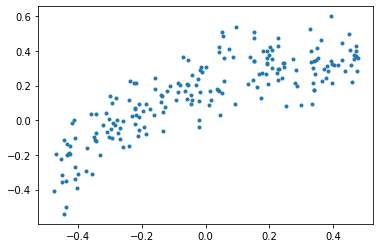

In [3]:
from scipy import special

# produce training data

sigma = 0.1
n = 200
np.random.seed(3)
t = np.random.rand(n) - 0.5
noise = sigma * np.random.randn(n)

def legendre(t, p):
    n = t.size
    return np.stack(
        [special.legendre(d)(t) for d in range(p)])

p = 6  # number of features
X = legendre(t, p)
theta = 0.4*np.random.randn(p)
y = theta @ X + noise   # training data 

plt.plot(t, y, '.')

## Explanation

0.537605023744573


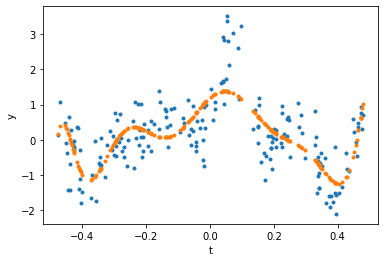

In [4]:
# Given observation points
n = 200
np.random.seed(3)
t = np.random.rand(n) - 0.5


#  Ground truth (HIDDEN!)
features = fourier
p = 11
X = features(t, p)
theta = [0.2, 0.7, 0.3, -0.2, 0.4, -0.5, 0.1, 0.2, 0.1, 0.5, 0.3]

# Generated data based on ground truth
y = theta @ X + 0.5*np.random.randn(n)

plt.plot(t, y, '.')
plt.xlabel('t')
plt.ylabel('y')

# How do find the ground truth


# Hypothesize 
features = legendre
p = 11
X = features(t, p)

# Cross-validation
mse = 0
nfolds = 100
for i in range(nfolds):
    split = np.random.rand(n) < 0.1
    X_train = X[:, ~split]
    y_train = y[~split]
    X_test = X[:, split]
    y_test = y[split]

    theta_hat = np.linalg.inv(X_train @ X_train.T) @ X_train @ y_train  # fit
    y_predict = theta_hat @ X_test   #  predict

    mse += ((y_test - y_predict)**2).mean()  # cost function

print(mse/nfolds)

plt.plot(t, theta_hat @ X, '.')

# Assignment 

Due Oct 30

Given some points $(t, y)$, find the model that will predict $y$ from $t$ for new data sampled from the same process. Assume Gaussian noise. Assume that the data are 

The data come from one of the models above but the degree `p` is unknown. 

In [5]:
t = np.array([-0.49,  0.48, -0.19,  0.24, -0.08,  0.49, -0.21, -0.16, -0.13,
        0.5 ,  0.09,  0.14, -0.27,  0.01,  0.37, -0.42, -0.45, -0.14,
        0.17,  0.14, -0.38,  0.18, -0.45, -0.3 , -0.12,  0.02, -0.11,
        0.38, -0.01,  0.12,  0.44,  0.32,  0.2 , -0.26,  0.04,  0.23,
        0.18,  0.14,  0.15, -0.21, -0.41,  0.06, -0.25, -0.31, -0.42,
       -0.09,  0.34, -0.05,  0.21,  0.26,  0.27,  0.27, -0.28, -0.49,
        0.01,  0.29, -0.15,  0.34,  0.49,  0.03, -0.12,  0.15, -0.02,
       -0.02,  0.24,  0.47, -0.06,  0.34, -0.29, -0.43, -0.09,  0.14,
        0.23,  0.23,  0.08,  0.12, -0.42, -0.12, -0.19,  0.45, -0.36,
       -0.08,  0.13, -0.16,  0.23,  0.44,  0.5 , -0.3 ,  0.45, -0.24,
       -0.42,  0.28,  0.11, -0.47,  0.11, -0.27,  0.41,  0.46, -0.36,
       -0.32, -0.05,  0.45, -0.08, -0.39, -0.34, -0.37,  0.32, -0.24,
       -0.44, -0.03, -0.4 ,  0.47,  0.27, -0.32, -0.2 , -0.37, -0.13,
       -0.07,  0.08, -0.44, -0.44,  0.43, -0.04,  0.09,  0.35, -0.02,
       -0.12,  0.42, -0.39, -0.25, -0.45,  0.44, -0.02,  0.31, -0.48,
        0.23, -0.07, -0.17,  0.4 ,  0.35, -0.2 ,  0.45, -0.1 ,  0.17,
        0.21, -0.11, -0.3 ,  0.48,  0.31,  0.21,  0.2 ,  0.27,  0.47,
       -0.39,  0.46,  0.31,  0.23,  0.5 , -0.43,  0.13, -0.34,  0.02,
       -0.27,  0.3 , -0.18,  0.41,  0.17, -0.15,  0.29, -0.05, -0.39,
        0.25,  0.28,  0.02, -0.21,  0.11,  0.16,  0.47,  0.1 ,  0.03,
        0.22,  0.43,  0.16, -0.21, -0.16,  0.39,  0.25,  0.04, -0.4 ,
        0.22,  0.46,  0.12,  0.15,  0.48, -0.48, -0.15, -0.42,  0.28,
       -0.36,  0.31])

In [6]:
y = np.array([-0.06, -0.09, -0.19,  0.  , -0.03, -0.18, -0.12, -0.31, -0.17,
       -0.18,  0.09,  0.16, -0.28,  0.15, -0.04,  0.04,  0.06, -0.28,
        0.18,  0.11,  0.27,  0.34,  0.11, -0.22, -0.18,  0.39, -0.29,
       -0.06,  0.1 ,  0.08, -0.  , -0.02,  0.06, -0.35,  0.16,  0.28,
       -0.03,  0.17,  0.37, -0.15,  0.19,  0.21, -0.29, -0.33,  0.08,
       -0.24,  0.06,  0.02,  0.26,  0.07,  0.1 ,  0.09, -0.52,  0.03,
        0.3 ,  0.1 , -0.15, -0.26, -0.26,  0.1 , -0.27,  0.11,  0.02,
        0.1 ,  0.09, -0.23, -0.03, -0.21, -0.4 , -0.04, -0.17,  0.07,
        0.08,  0.15,  0.27,  0.41,  0.07, -0.31, -0.29, -0.3 ,  0.06,
       -0.1 ,  0.08, -0.29,  0.07, -0.2 ,  0.06, -0.25, -0.13, -0.34,
        0.05,  0.21,  0.07,  0.13,  0.32, -0.26, -0.01, -0.17, -0.31,
       -0.21,  0.11, -0.1 , -0.01,  0.16, -0.01,  0.1 , -0.1 , -0.28,
        0.08, -0.09,  0.04, -0.07, -0.11, -0.35, -0.23,  0.05, -0.25,
       -0.12,  0.15,  0.01,  0.17,  0.02, -0.01,  0.04, -0.21,  0.03,
       -0.15,  0.08,  0.08, -0.38,  0.19, -0.18,  0.13, -0.03,  0.1 ,
        0.1 , -0.05, -0.29, -0.36,  0.12, -0.42, -0.32, -0.  ,  0.22,
        0.  , -0.36, -0.33,  0.06, -0.04,  0.18, -0.08, -0.22, -0.25,
        0.09, -0.03, -0.17,  0.02, -0.09,  0.13,  0.24, -0.04,  0.15,
       -0.44, -0.02, -0.24,  0.09,  0.17, -0.35, -0.15, -0.1 ,  0.08,
        0.  ,  0.09,  0.22, -0.38,  0.06,  0.14, -0.26,  0.19,  0.41,
        0.13, -0.13,  0.3 , -0.15, -0.02, -0.09, -0.07,  0.31,  0.04,
       -0.02, -0.05,  0.07,  0.16, -0.21,  0.01, -0.2 , -0.09,  0.11,
        0.08, -0.  ])

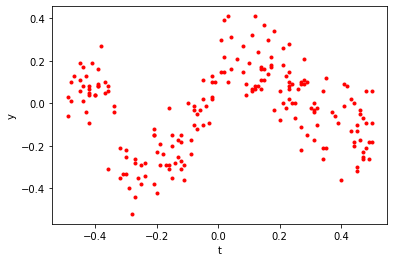

In [7]:
plt.plot(t, y, '.', c='r')
plt.xlabel('t')
plt.ylabel('y');

### Steps
1. Select performance measure (cost function):  Use MSE.
2. Implement linear regression for the two models: Assume known model and number of features p, find the parameters theta.
3. Visualize the fit and print the training cost function.
4. Fit with a different model and a different p.
5. Use 10-fold cross-validation to compare models.  Measure average cross-validated MSE.  Output: best model and best `p`.
6. (In class or evaluation) use the testing data set to test the perfomance.

172.4099792342899


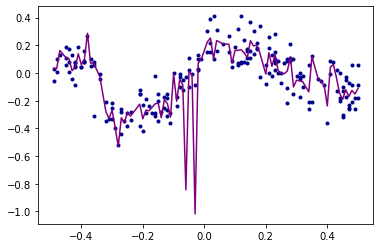

In [8]:
# Steps 1-3. Perform an example of finding theta given p and a model

models = [fourier, legendre]

features = fourier
p = 80
X = features(t, p)

# Cross-validation
mse = 0
nfolds = 100
for i in range(nfolds):
    split = np.random.rand(n) < 0.1
    X_train = X[:, ~split]
    y_train = y[~split]
    X_test = X[:, split]
    y_test = y[split]

    theta_hat = np.linalg.inv(X_train @ X_train.T) @ X_train @ y_train  # fit
    y_predict = theta_hat @ X_test   #  predict
    
    mse += ((y_test - y_predict)**2).mean()  # cost function

print(mse/nfolds)

plt.plot(t, y, '.',c='darkblue')

points = list(zip(t,theta_hat @ X ))
points.sort()
plt.plot([x for x,y in points], [y for x,y in points], c='purple');
# plt.plot(t, theta_hat @ X)

In [9]:
# Steps 4 - 6: Iterate over values of p ([]). For each value of p, train a legendre and fourier. record the mse over 10 folds for each model/p pair. At the end select the model/p pair with the lowest mse
models = [fourier, legendre]

# Set up empty
mse_results = []
p_model_results = []
for p in range(1,50):
    for features in models:
        # Find theta
        mse = 0
        nfolds = 10
        X = features(t,p)
        fold_size = X.shape[1]/nfolds
        for i in range(nfolds):
            split = np.arange(fold_size*i, fold_size*(i+1))
            test_idx = np.array([idx in split for idx in np.arange(X.shape[1])])
            train_idx = np.array([idx not in split for idx in np.arange(X.shape[1])])
#             split = np.random.rand(n) < 0.1
            X_train = X[:, train_idx]
            y_train = y[train_idx]
            X_test = X[:, test_idx]
            y_test = y[test_idx]

            theta_hat = np.linalg.inv(X_train @ X_train.T) @ X_train @ y_train  # fit
            y_predict = theta_hat @ X_test   #  predict
            
            mse += ((y_test - y_predict)**2).mean()  # cost function

        mse_for_p_model = (mse/nfolds)
        mse_results.append(mse_for_p_model)
        p_model_results.append((p, features))

mse_results = np.array(mse_results)
best_mse, best_idx= mse_results.min(), mse_results.argmin()
best_p, best_model = p_model_results[best_idx]
best_p, best_model

(16, <function __main__.fourier(t, p)>)

16 is the best fit....?

In [10]:
mse_results

array([3.64563858e-02, 3.64563858e-02, 2.78159463e-02, 3.64920642e-02,
       2.68913915e-02, 3.59988505e-02, 1.88579093e-02, 2.29097651e-02,
       1.54965628e-02, 2.00369147e-02, 1.41371836e-02, 1.58645830e-02,
       1.39866034e-02, 1.29039346e-02, 1.31728468e-02, 1.29874989e-02,
       1.31557762e-02, 1.29501105e-02, 1.32275215e-02, 1.30531990e-02,
       1.20001942e-02, 1.29996112e-02, 1.21255093e-02, 1.31221564e-02,
       1.22300281e-02, 1.31266626e-02, 1.22968694e-02, 1.27477671e-02,
       1.24232957e-02, 1.20729108e-02, 1.16969211e-02, 1.22581357e-02,
       1.17698269e-02, 1.21242802e-02, 1.18552143e-02, 1.35166070e-02,
       1.19620352e-02, 2.25781274e-02, 1.18432117e-02, 1.64267370e-02,
       1.20331682e-02, 7.02043317e-02, 1.21789993e-02, 3.95732861e-02,
       1.22341379e-02, 4.30961819e-01, 1.22691387e-02, 2.58713696e+00,
       1.23991613e-02, 6.96390571e+01, 1.24756366e-02, 6.78626659e-02,
       1.25210262e-02, 3.02195798e-02, 1.25926445e-02, 2.22757620e-02,
      

In [11]:
p_model_results
#mse_results

[(1, <function __main__.fourier(t, p)>),
 (1, <function __main__.legendre(t, p)>),
 (2, <function __main__.fourier(t, p)>),
 (2, <function __main__.legendre(t, p)>),
 (3, <function __main__.fourier(t, p)>),
 (3, <function __main__.legendre(t, p)>),
 (4, <function __main__.fourier(t, p)>),
 (4, <function __main__.legendre(t, p)>),
 (5, <function __main__.fourier(t, p)>),
 (5, <function __main__.legendre(t, p)>),
 (6, <function __main__.fourier(t, p)>),
 (6, <function __main__.legendre(t, p)>),
 (7, <function __main__.fourier(t, p)>),
 (7, <function __main__.legendre(t, p)>),
 (8, <function __main__.fourier(t, p)>),
 (8, <function __main__.legendre(t, p)>),
 (9, <function __main__.fourier(t, p)>),
 (9, <function __main__.legendre(t, p)>),
 (10, <function __main__.fourier(t, p)>),
 (10, <function __main__.legendre(t, p)>),
 (11, <function __main__.fourier(t, p)>),
 (11, <function __main__.legendre(t, p)>),
 (12, <function __main__.fourier(t, p)>),
 (12, <function __main__.legendre(t, p)>)

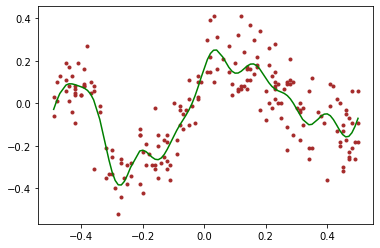

Best model: <function fourier at 0x0AD1EF18>, best p: 16


In [12]:
p = best_p
features = best_model
X = features(t, p)
theta_hat = np.linalg.inv(X @ X.T) @ X @ y


plt.plot(t, y, '.',c='brown')

points = list(zip(t,theta_hat @ X ))
points.sort()
plt.plot([x for x,y in points], [y for x,y in points],c='g')
plt.show()
# plt.plot(t, theta_hat @ X)
print(f"Best model: {best_model}, best p: {p}");

In [13]:
# Using the model on new data:
# Set up th emodel
#p = best_p
#features = best_model
#X = features(t, p)
#theta_hat = np.linalg.inv(X @ X.T) @ X @ y

# Get new data, create features with degree best_p
#t_new = []

#X_new = features(t_new, p)

# Compute the prediction of the new data
#y_new_pred = theta_hat @ X_new
#y_new_pred

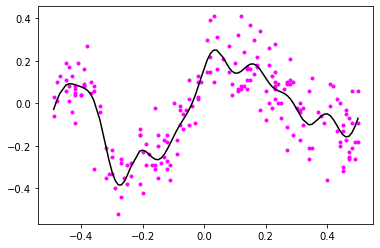

Best model: <function fourier at 0x0AD1EF18>, best p: 16


In [14]:
p = best_p
features = best_model
X = features(t, p)
theta_hat = np.linalg.inv(X @ X.T) @ X @ y


plt.plot(t, y, '.', c='magenta')

points = list(zip(t,theta_hat @ X ))
points.sort()
plt.plot([x for x,y in points], [y for x,y in points], c='k')
plt.show()
# plt.plot(t, theta_hat @ X)
print(f"Best model: {best_model}, best p: {p}")

Many plots

0.036456385802469134 1 <function fourier at 0x0AD1EF18>


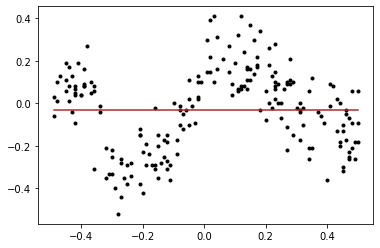

0.036456385802469134 1 <function legendre at 0x0BD8CCD8>


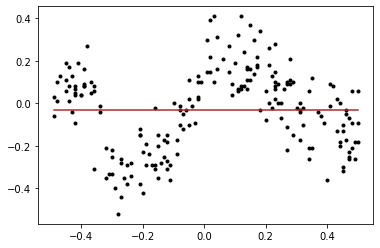

0.02781594626534791 2 <function fourier at 0x0AD1EF18>


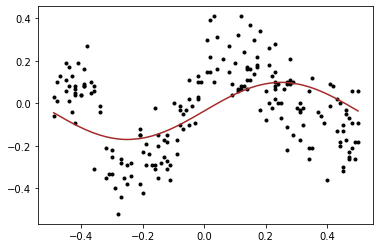

0.03649206422047506 2 <function legendre at 0x0BD8CCD8>


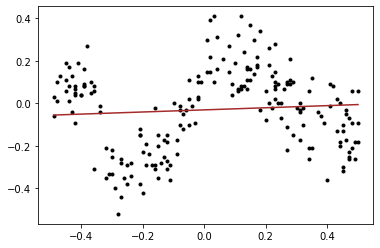

0.02689139147730814 3 <function fourier at 0x0AD1EF18>


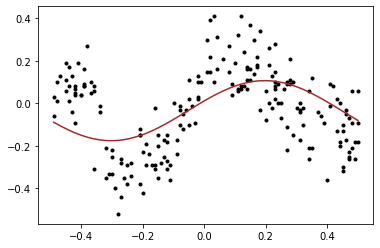

0.03599885052574372 3 <function legendre at 0x0BD8CCD8>


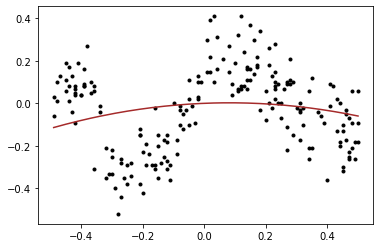

0.018857909280125432 4 <function fourier at 0x0AD1EF18>


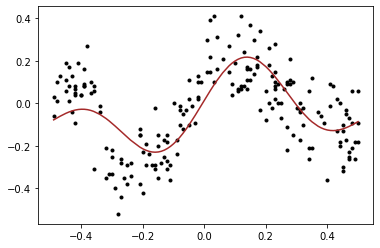

0.022909765125774684 4 <function legendre at 0x0BD8CCD8>


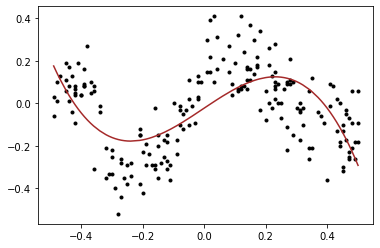

0.015496562802386829 5 <function fourier at 0x0AD1EF18>


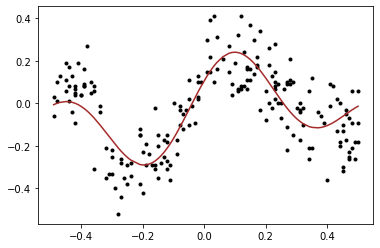

0.020036914733040617 5 <function legendre at 0x0BD8CCD8>


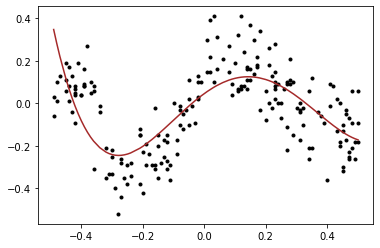

0.014137183578989809 6 <function fourier at 0x0AD1EF18>


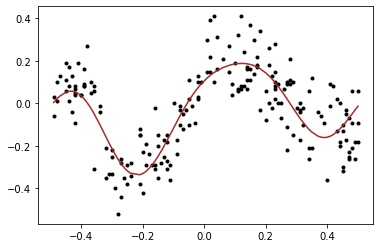

0.01586458296065882 6 <function legendre at 0x0BD8CCD8>


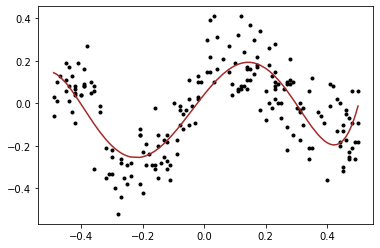

0.013986603359511343 7 <function fourier at 0x0AD1EF18>


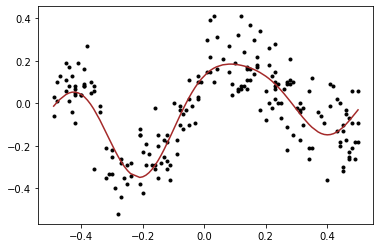

0.012903934578362539 7 <function legendre at 0x0BD8CCD8>


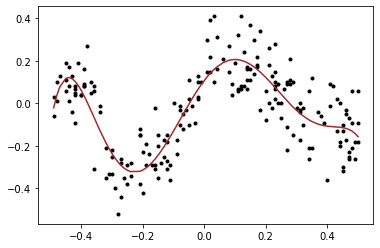

0.013172846835956065 8 <function fourier at 0x0AD1EF18>


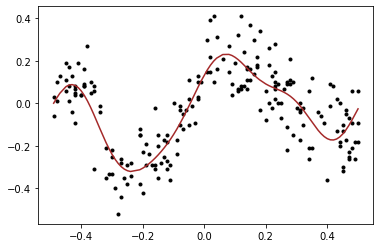

0.01298749891751932 8 <function legendre at 0x0BD8CCD8>


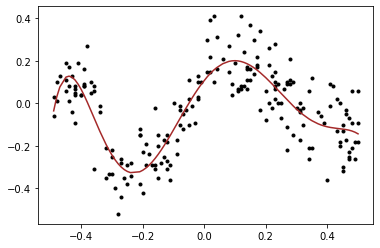

0.013155776231653638 9 <function fourier at 0x0AD1EF18>


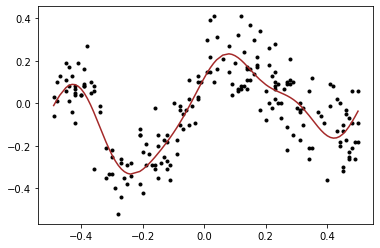

0.012950110511789107 9 <function legendre at 0x0BD8CCD8>


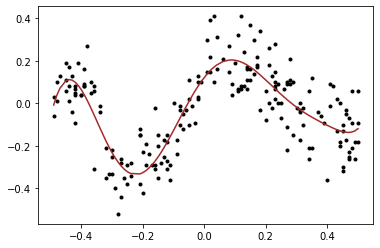

0.01322752150995527 10 <function fourier at 0x0AD1EF18>


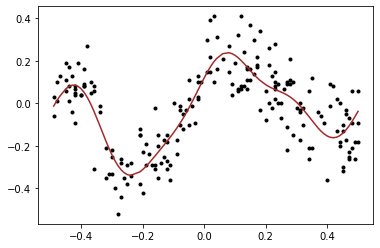

0.013053199014739777 10 <function legendre at 0x0BD8CCD8>


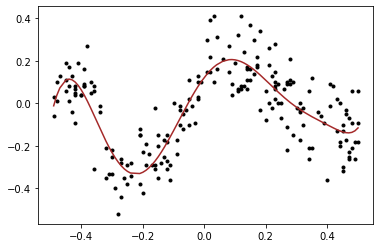

0.012000194198302793 11 <function fourier at 0x0AD1EF18>


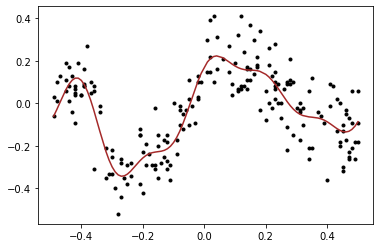

0.012999611219882615 11 <function legendre at 0x0BD8CCD8>


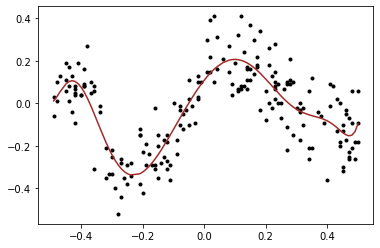

0.012125509344852622 12 <function fourier at 0x0AD1EF18>


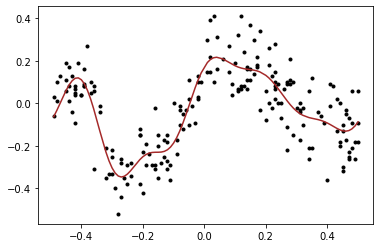

0.013122156406250524 12 <function legendre at 0x0BD8CCD8>


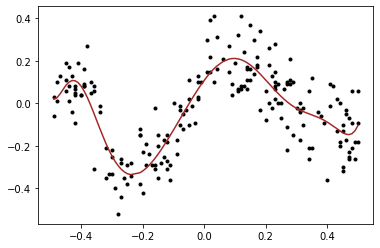

0.012230028126825316 13 <function fourier at 0x0AD1EF18>


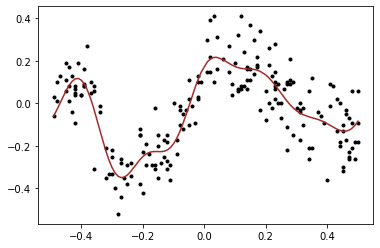

0.013126662559402386 13 <function legendre at 0x0BD8CCD8>


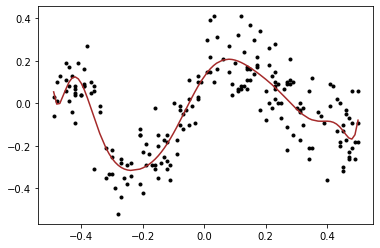

0.012296869399315194 14 <function fourier at 0x0AD1EF18>


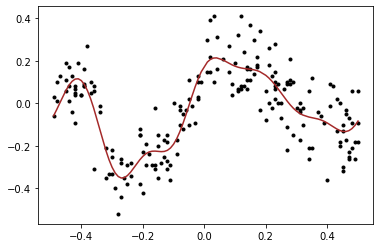

0.012747767149748743 14 <function legendre at 0x0BD8CCD8>


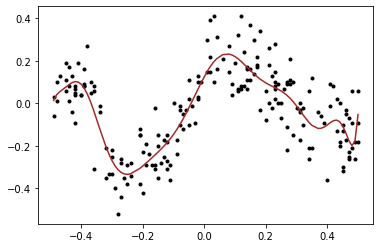

0.01242329566779104 15 <function fourier at 0x0AD1EF18>


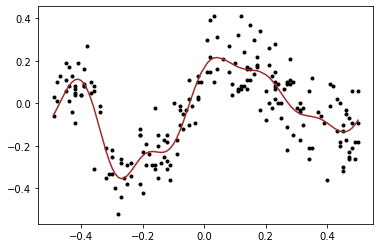

0.012072910812838056 15 <function legendre at 0x0BD8CCD8>


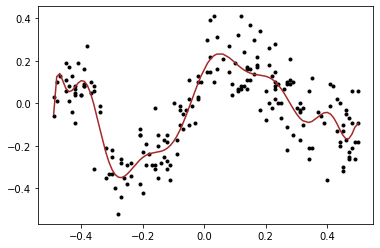

0.01169692111938649 16 <function fourier at 0x0AD1EF18>


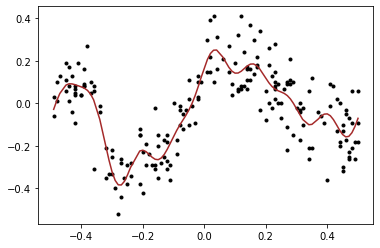

0.012258135728769649 16 <function legendre at 0x0BD8CCD8>


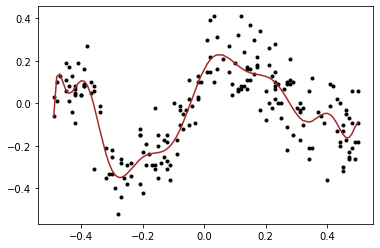

0.011769826888658113 17 <function fourier at 0x0AD1EF18>


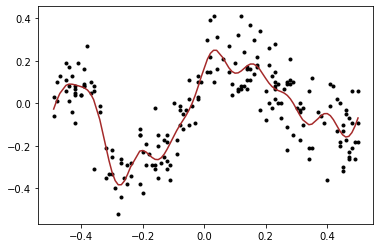

0.012124280225075394 17 <function legendre at 0x0BD8CCD8>


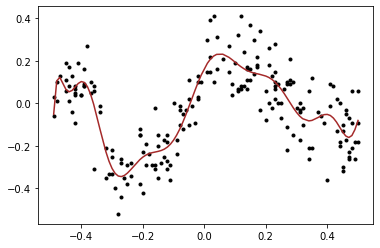

0.011855214284940886 18 <function fourier at 0x0AD1EF18>


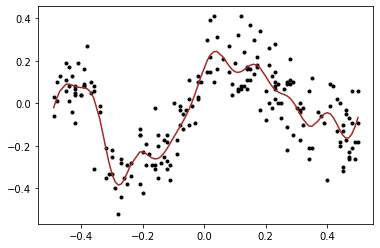

0.013516607027014377 18 <function legendre at 0x0BD8CCD8>


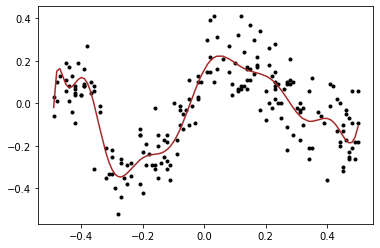

0.01196203515695834 19 <function fourier at 0x0AD1EF18>


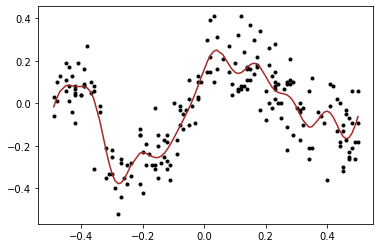

0.02257812735279477 19 <function legendre at 0x0BD8CCD8>


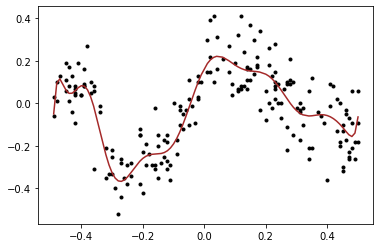

0.011843211691778724 20 <function fourier at 0x0AD1EF18>


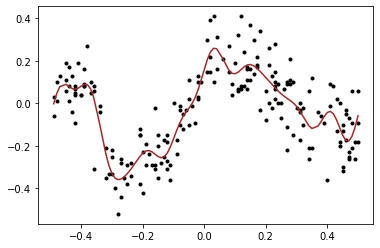

0.01642673695001195 20 <function legendre at 0x0BD8CCD8>


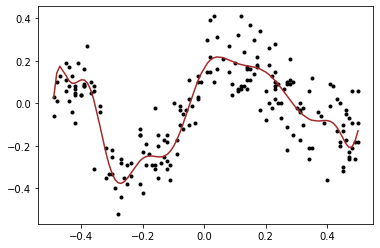

0.012033168236038672 21 <function fourier at 0x0AD1EF18>


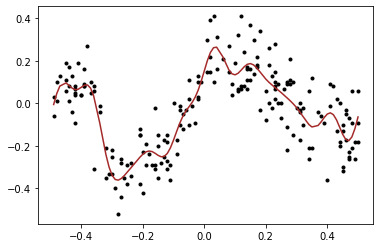

0.0702043317326082 21 <function legendre at 0x0BD8CCD8>


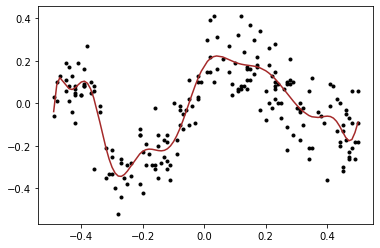

0.01217899932535955 22 <function fourier at 0x0AD1EF18>


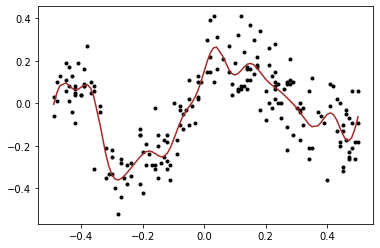

0.03957328611034953 22 <function legendre at 0x0BD8CCD8>


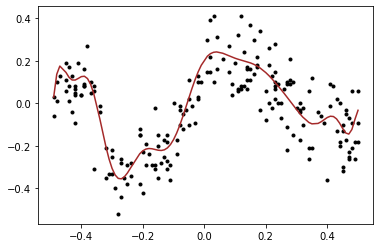

0.01223413786534815 23 <function fourier at 0x0AD1EF18>


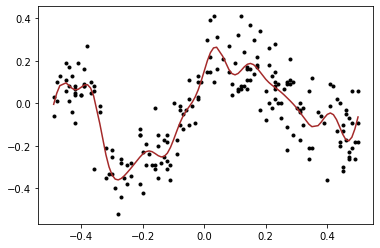

0.43096181938489037 23 <function legendre at 0x0BD8CCD8>


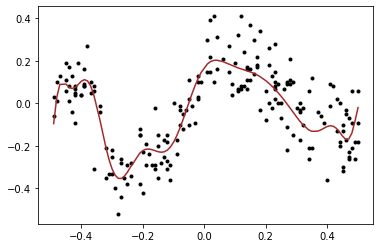

0.012269138706748405 24 <function fourier at 0x0AD1EF18>


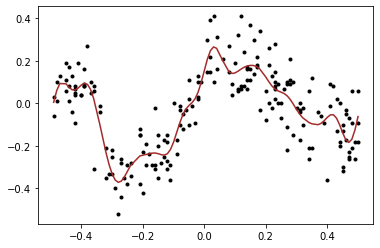

2.587136963451521 24 <function legendre at 0x0BD8CCD8>


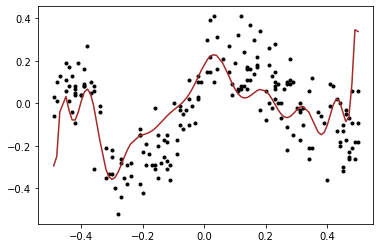

0.012399161348886713 25 <function fourier at 0x0AD1EF18>


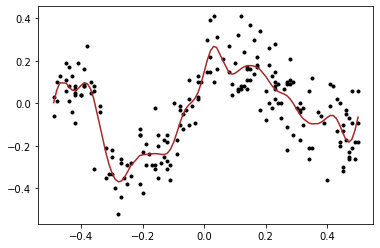

69.63905712425515 25 <function legendre at 0x0BD8CCD8>


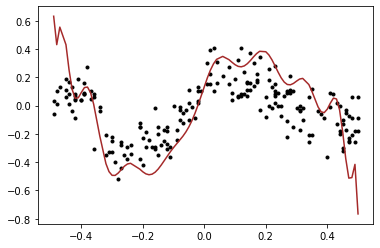

0.012475636576133575 26 <function fourier at 0x0AD1EF18>


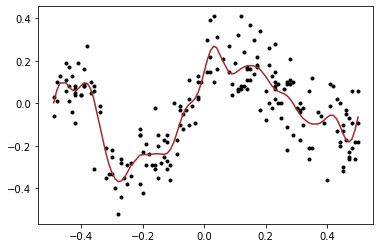

0.0678626658852055 26 <function legendre at 0x0BD8CCD8>


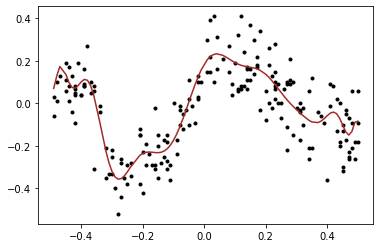

0.012521026208180266 27 <function fourier at 0x0AD1EF18>


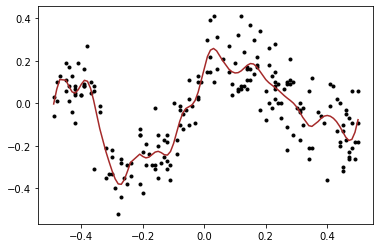

0.03021957976071595 27 <function legendre at 0x0BD8CCD8>


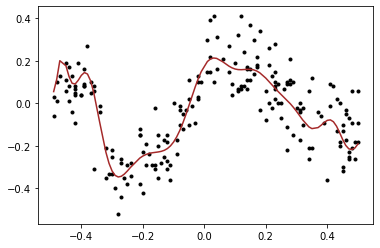

0.012592644537857023 28 <function fourier at 0x0AD1EF18>


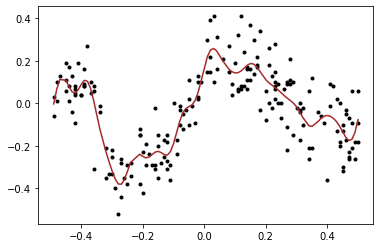

0.022275762005804067 28 <function legendre at 0x0BD8CCD8>


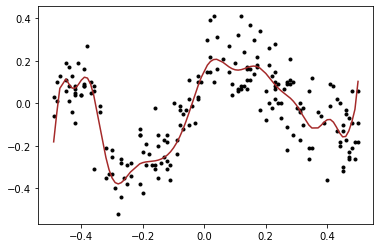

0.012724303346707691 29 <function fourier at 0x0AD1EF18>


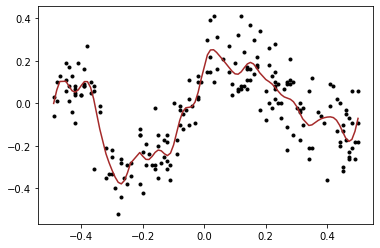

0.018646510986283837 29 <function legendre at 0x0BD8CCD8>


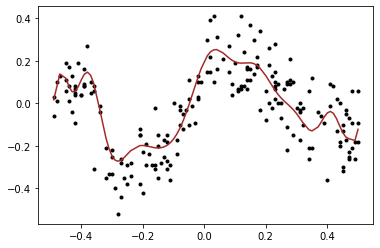

0.012723313157298497 30 <function fourier at 0x0AD1EF18>


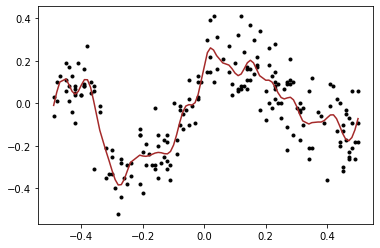

0.049365768020731934 30 <function legendre at 0x0BD8CCD8>


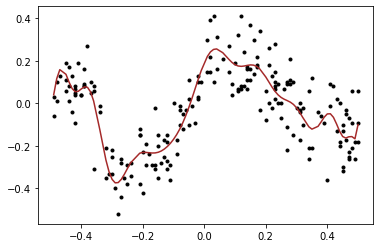

0.012963479120372629 31 <function fourier at 0x0AD1EF18>


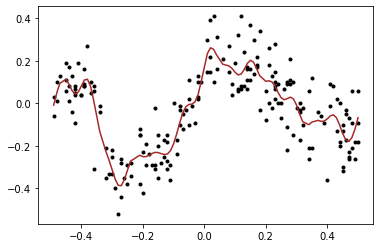

0.04106266315109737 31 <function legendre at 0x0BD8CCD8>


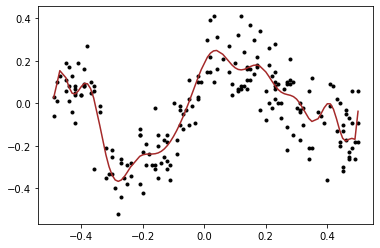

0.012925276979774464 32 <function fourier at 0x0AD1EF18>


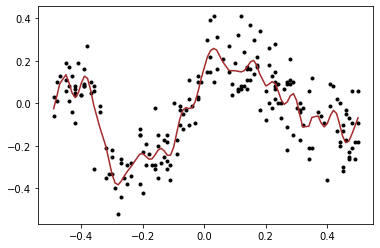

4.16095463549391 32 <function legendre at 0x0BD8CCD8>


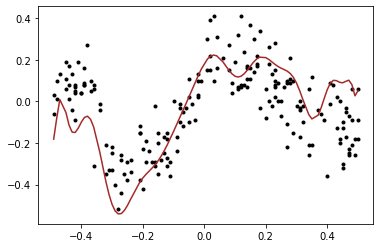

0.012997449584201414 33 <function fourier at 0x0AD1EF18>


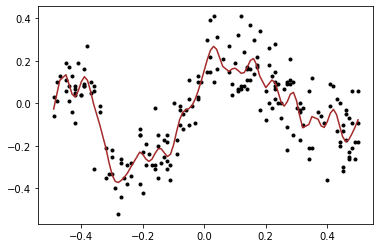

1.4810070188350304 33 <function legendre at 0x0BD8CCD8>


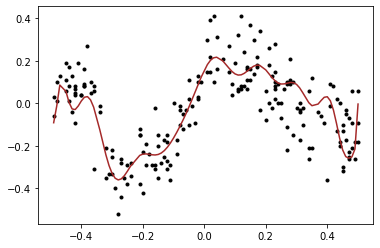

0.013121417873853587 34 <function fourier at 0x0AD1EF18>


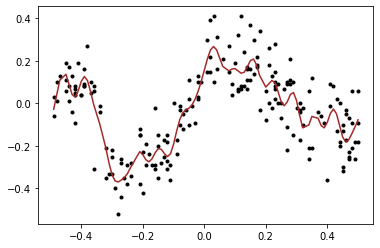

0.37350151439641455 34 <function legendre at 0x0BD8CCD8>


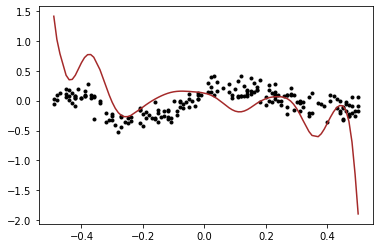

0.013276397624944156 35 <function fourier at 0x0AD1EF18>


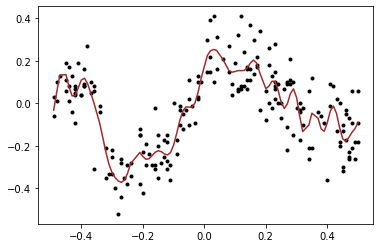

0.028629151375611568 35 <function legendre at 0x0BD8CCD8>


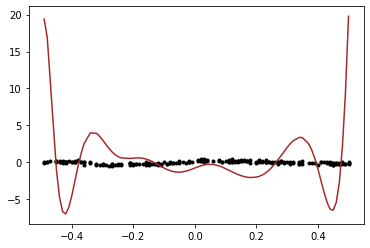

0.013549365449239962 36 <function fourier at 0x0AD1EF18>


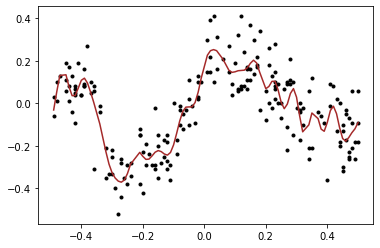

0.05458411763485459 36 <function legendre at 0x0BD8CCD8>


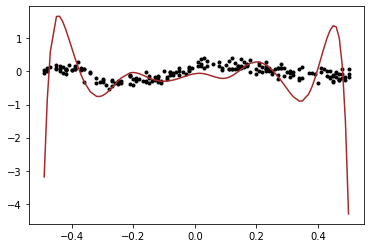

0.013723157489701366 37 <function fourier at 0x0AD1EF18>


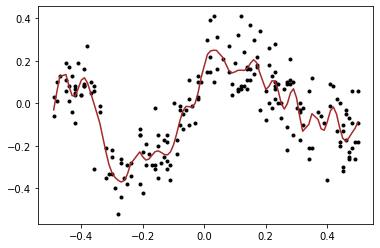

0.11966552246625653 37 <function legendre at 0x0BD8CCD8>


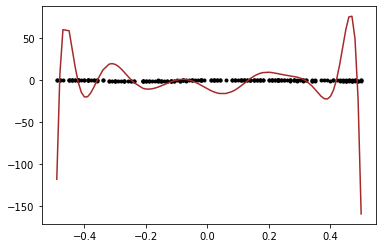

0.013859618323990153 38 <function fourier at 0x0AD1EF18>


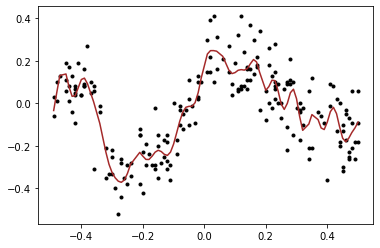

0.8838591180948823 38 <function legendre at 0x0BD8CCD8>


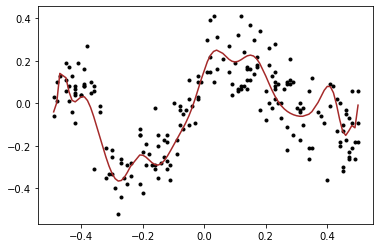

0.013846466910615796 39 <function fourier at 0x0AD1EF18>


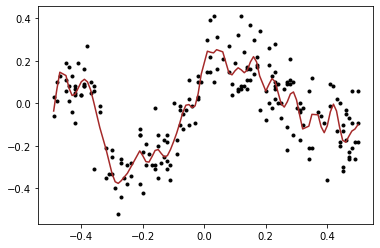

0.04444316044795864 39 <function legendre at 0x0BD8CCD8>


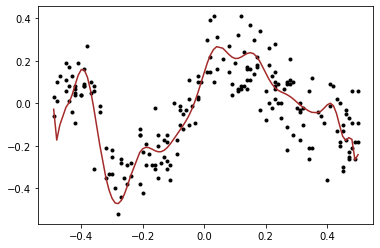

0.013775314174215014 40 <function fourier at 0x0AD1EF18>


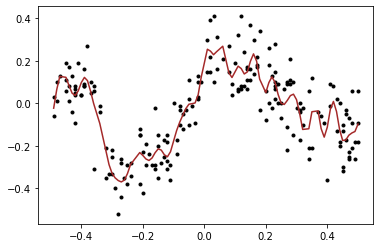

0.09463193516967366 40 <function legendre at 0x0BD8CCD8>


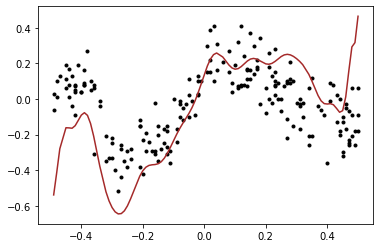

0.013801310818896809 41 <function fourier at 0x0AD1EF18>


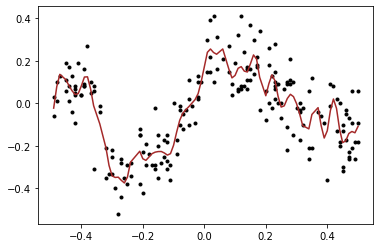

0.2690557235787082 41 <function legendre at 0x0BD8CCD8>


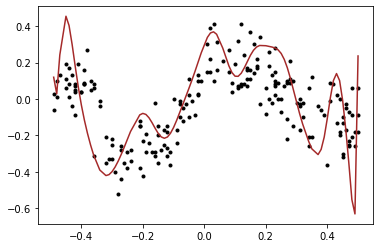

0.0137730155651621 42 <function fourier at 0x0AD1EF18>


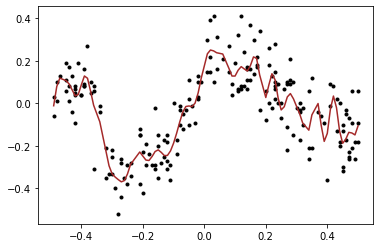

0.11524186826663083 42 <function legendre at 0x0BD8CCD8>


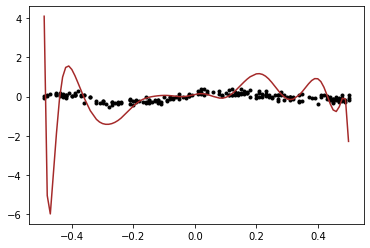

0.013982639864129332 43 <function fourier at 0x0AD1EF18>


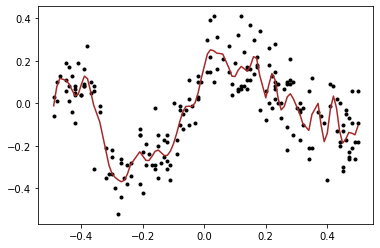

1.4667868611942976 43 <function legendre at 0x0BD8CCD8>


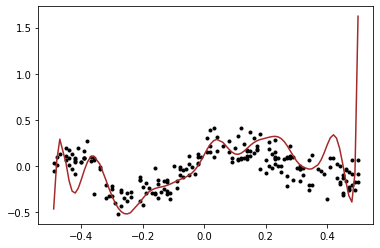

0.014135599822674141 44 <function fourier at 0x0AD1EF18>


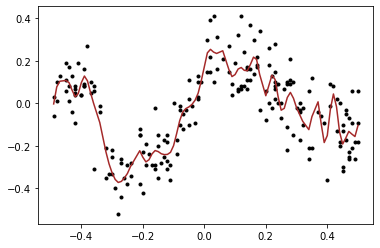

204.5929494835082 44 <function legendre at 0x0BD8CCD8>


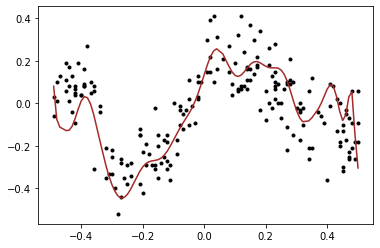

0.01421706612634869 45 <function fourier at 0x0AD1EF18>


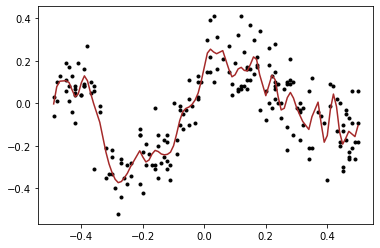

0.0740508197698429 45 <function legendre at 0x0BD8CCD8>


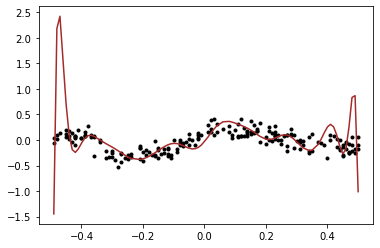

0.014576504232702478 46 <function fourier at 0x0AD1EF18>


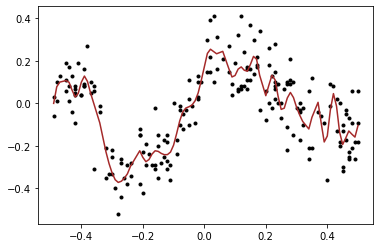

0.8963665667149243 46 <function legendre at 0x0BD8CCD8>


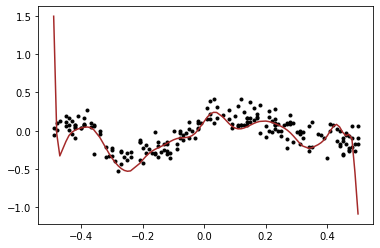

0.01490041647947978 47 <function fourier at 0x0AD1EF18>


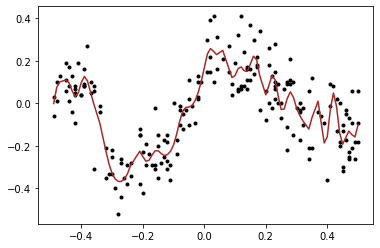

0.23504548021418933 47 <function legendre at 0x0BD8CCD8>


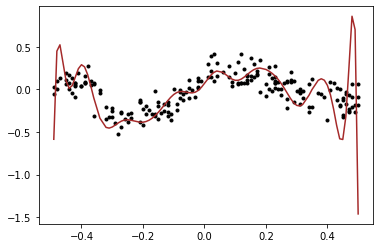

0.015182289907320554 48 <function fourier at 0x0AD1EF18>


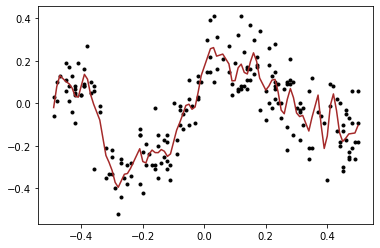

0.4976630212042906 48 <function legendre at 0x0BD8CCD8>


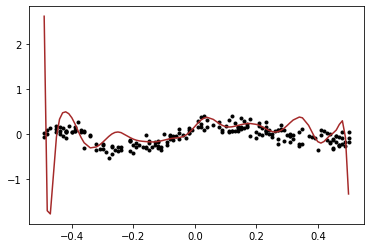

0.01572627964828006 49 <function fourier at 0x0AD1EF18>


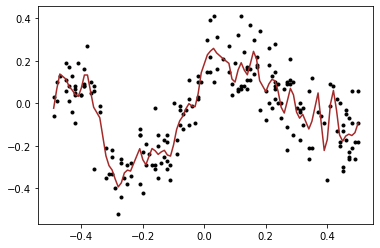

0.4484471748549975 49 <function legendre at 0x0BD8CCD8>


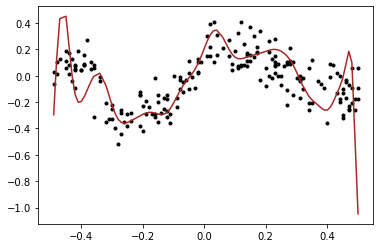

In [15]:
for mse, (p, model) in zip(mse_results, p_model_results):
    print(mse, p, model)
    p = p
    features = model
    X = features(t, p)
    theta_hat = np.linalg.inv(X @ X.T) @ X @ y


    plt.plot(t, y, '.', c='k')

    points = list(zip(t,theta_hat @ X ))
    points.sort()
    plt.plot([x for x,y in points], [y for x,y in points], c='brown')
    plt.show()
    # plt.plot(t, theta_hat @ X)